Using Iris Plant Dataset, write a scratch program in python to train softmax regression that predicts the class of Iris plant. 

Dataset: https://www.kaggle.com/datasets/arshid/iris-flower-dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score

data = pd.read_csv("E:\Milan\MDS\machine learning\Dataset\iris data set\IRIS.csv")  #reading data from csv file
data = pd.DataFrame(data) #assigning the data into dataframe data type

In [2]:
class MultiClassLogisticRegression:
        
    def __init__(self, iteration):       #defininf constructor
        self.n_iter = iteration
        
    def fit(self, X, y, lr): 
        np.random.seed(4) 
        
        #different categories
        self.classes = len(y[0])        #number of differnt classes in labelled data
        
        #loss array
        self.loss = []
        
        #random weight array with size of number of different class and number of features in data i.e there will be len(y[0]) different values for each weight
        self.weights = np.random.uniform(1,3,size=((self.classes),X.shape[1]))
        self.biases = np.random.uniform(0,3,size=(1,(self.classes)))
        
        #fit the x with biases and y with one hot encoded
        self.fit_data(X, y, lr)
        return self
 
    def fit_data(self, X, y, lr):
        i = 0
        X = normalize(X)         #normalizing the data before proceding
       
        while (i < self.n_iter): #loop will continue until every row is iterated
            y_predict = self.predict_(X)            #predicting y value i.e there will be different len(X[0]) values for each row in X
            
            error = y - y_predict                   #determining error in prediction with different len(X[0])  for each row in X
            self.weights += lr * np.dot(error.T, X)/X.shape[0]      #the weights are updated with help of learning rate
            self.biases += lr*(np.sum(error, axis = 0))/X.shape[0]   #updating of biases
            
            y_predict = self.predict_(X)
            self.loss.append( -1 * np.mean(y * np.log(y_predict)))  #using log loss cross entropy function to determine loss
            #printing improvement in model every once in 1000 iteration
            if i % 1000 == 0: 
                print('Percentage of accurate prediction in {} iterations is {}'.format(i, self.evaluate_(X, y)),"and loss is:",str(self.loss[i]))
            i +=1
            self.finalIterationPrediction = y_predict
        print('Percentage of accurate prediction in {} iterations is {}'.format(i, self.evaluate_(X, y)),"and loss is:",str(self.loss[self.n_iter-1]))
        
    def predict_(self, X):
        #predicting y value after dot product of X having len(X),len(X[0]) size of array and weight having len(X[0]),len(y[0]) size of array and adding biases
        pre_vals = np.dot(X, self.weights.T).reshape(-1,(self.classes)) + self.biases   #reshaping result having exatly len(y[0]) columns
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        #softmax equation with len(self.classes) output for each row in X
        z = np.exp(z)/np.sum(np.exp(z), axis = 1).reshape(-1,1)  #finding sum along row not columns
        return z
    
    def evaluate_(self, X, y):
        #finding accuracypercentage after determing total number of "True" divided by total number of ("True" and "False")
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))*100 

In [3]:
#normalizing function for X data
def normalize(X):
    return (X- np.mean(X, axis = 0))/np.std(X)

Percentage of accurate prediction in 0 iterations is 25.0 and loss is: 0.9100250014575472
Percentage of accurate prediction in 1000 iterations is 55.00000000000001 and loss is: 0.43095781019069457
Percentage of accurate prediction in 2000 iterations is 65.83333333333333 and loss is: 0.24316258196426538
Percentage of accurate prediction in 3000 iterations is 85.0 and loss is: 0.16641996834071485
Percentage of accurate prediction in 4000 iterations is 92.5 and loss is: 0.13724974304167098
Percentage of accurate prediction in 5000 iterations is 94.16666666666667 and loss is: 0.12324580617050829
Percentage of accurate prediction in 6000 iterations is 94.16666666666667 and loss is: 0.11476578229598958
Percentage of accurate prediction in 7000 iterations is 93.33333333333333 and loss is: 0.10877844027266738
Percentage of accurate prediction in 8000 iterations is 93.33333333333333 and loss is: 0.10413309473138964
Percentage of accurate prediction in 9000 iterations is 93.33333333333333 and lo

Percentage of accurate prediction in 81000 iterations is 95.83333333333334 and loss is: 0.04401284769987836
Percentage of accurate prediction in 82000 iterations is 95.83333333333334 and loss is: 0.0437855171320657
Percentage of accurate prediction in 83000 iterations is 95.83333333333334 and loss is: 0.04356229699417604
Percentage of accurate prediction in 84000 iterations is 95.83333333333334 and loss is: 0.04334307307707312
Percentage of accurate prediction in 85000 iterations is 95.83333333333334 and loss is: 0.04312773540542725
Percentage of accurate prediction in 86000 iterations is 95.83333333333334 and loss is: 0.04291617804201709
Percentage of accurate prediction in 87000 iterations is 95.83333333333334 and loss is: 0.04270829890287845
Percentage of accurate prediction in 88000 iterations is 95.83333333333334 and loss is: 0.04250399958259457
Percentage of accurate prediction in 89000 iterations is 95.83333333333334 and loss is: 0.04230318518907973
Percentage of accurate predic

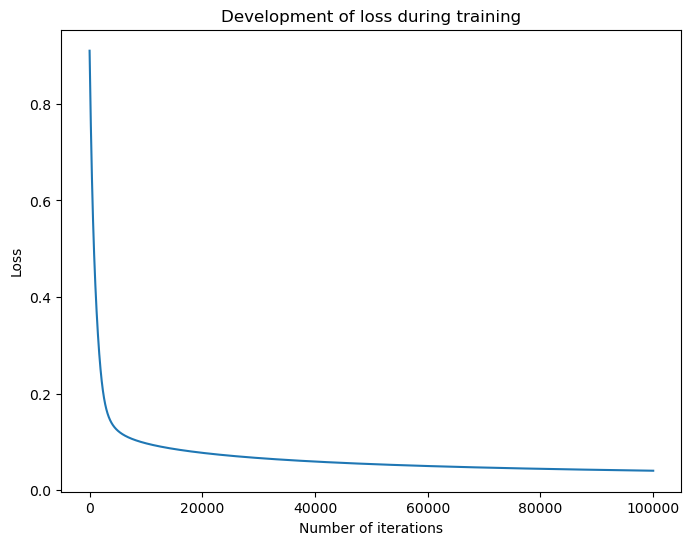

In [4]:
#creating object of python class and assigning a value of number of iteration to parameter
lr = MultiClassLogisticRegression(iteration= 100000)

#spliting the data frame into X data for input and y data for output
y = data.iloc[:,4]
X = data.iloc[:,0:4]

k = [[] for _ in range(len(y))]  #creating len(y) number of empty arrays inside empty array
    
original_apperance_unsorted = [] #
    
#finding different unique values in y data    
for i in range(len(y)):
    if y[i] not in original_apperance_unsorted:
        original_apperance_unsorted.append(y[i])
            
#one hot encoding of different values of class in y data
for i in range(len(y)):
    
    #assigning len(original_apperance_unsorted) number of data in each array that is inside array original_apperance_unsorted
    for j in range(len(original_apperance_unsorted)):
        if y[i] == original_apperance_unsorted[j]: k[i].append(1)
        else: k[i].append(0)

y = k  #assigning one hot encoded value of y data into y
 
#spliting the X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=18)

lr.fit(X_train, y_train, lr = 0.001) #assigning learning rate, and data to fit function of MultiLogisticRegression python class

#plotting decrease in log loss value over iterations
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lr.loss)), lr.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [5]:
#creating functions outside MultiLogisticRegressionClass insted of using lr.function_name()

In [6]:
#function to predict y value 
def softmaxx(z):
    mp = (np.exp(z)/np.sum(np.exp(z) , axis = 1).reshape(-1,1))
    return mp

In [7]:
#function to predict values from ok data using weights and biases calculate during last call of lr.fit() function
def predicted_value_at_end(ok):
    ok = normalize(ok)     #normalizing the ok data
    z = (np.dot(ok,lr.weights.T).reshape(-1,(lr.classes))+lr.biases)
    return softmaxx(z)  

In [8]:
#finding max value in each row of predicted values
def predicted_max_values(ok):
    y_test_max_value= []
    predicted_value_at_ends = predicted_value_at_end(ok)
    for i in predicted_value_at_ends:
        y_test_max_value.append(np.max(i))
    return y_test_max_value, predicted_value_at_ends

In [9]:
def one_code_class(ok):
    #if ok is a data frame
    if len(np.shape(ok)) == 3:
        ok = ok[0]   #changing to array
   
    #if ok is array
    if len(np.shape(ok)) == 2 :
        predicted_dummy_code = [[] for _ in range(len(ok))] 
        
    max_value = predicted_max_values(ok) 
    y = max_value[1]   #max value of each row of predicted values
    mp = max_value[0]  #array of all predicted values
    
    #one hot encoding using max value in each row of predited value
    for i in range(len(y)):
        for j in range(len(y[i])):
            if (mp[i] == y[i][j]):
                predicted_dummy_code[i].append(1)
            else:
                predicted_dummy_code[i].append(0)
    predicted_max_value = max_value
    
    return predicted_dummy_code, predicted_max_value

In [10]:
#function to print classification report, confusion matrix and accuracy score
def Report(x,y):
    encoded = one_code_class(x)[0] #getting predicted one hot encoded code
    print("Classification Report: \n",classification_report(y,encoded))
    print("\n\nConfusion Matrix:\n",multilabel_confusion_matrix(y,encoded))
    print("\n\nAccuracy Score:\n", accuracy_score(y,encoded))    

In [11]:
Report(X_train,y_train)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      0.93      0.94        42
           2       0.93      0.95      0.94        40

   micro avg       0.96      0.96      0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120
 samples avg       0.96      0.96      0.96       120



Confusion Matrix:
 [[[82  0]
  [ 0 38]]

 [[76  2]
  [ 3 39]]

 [[77  3]
  [ 2 38]]]


Accuracy Score:
 0.9583333333333334


In [12]:
Report(X_test,y_test)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



Confusion Matrix:
 [[[18  0]
  [ 1 11]]

 [[21  1]
  [ 0  8]]

 [[20  0]
  [ 0 10]]]


Accuracy Score:
 0.9666666666666667
